# DATA100 - Final Project: Storytelling with Data 

<hr>
<hr>

## Group 3 Members 
* Argonza, Antoinette Joy 
* Jamia, Gillian Nicole 
* Magsano, Niño Matthew 
* Reyes, Anton Gabriel

<hr>
<hr>

## Motivation

*As Lasallian students, we would want to determine the possible causes of child mortality and provide credible, consolidated information and insights that help prevent or solve this pressing social issue.*


<hr>
<hr>

## Libraries, Packages, or Modules

In [1]:
import os 
import csv
import time
import numpy as np
import pandas as pd
import seaborn as sns
import requests 
import datetime as dt
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from pylab import rcParams
from IPython.core.display import HTML

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.style.use('seaborn-whitegrid')

<hr>
<hr>

## Data Collection

### Datasets

**Initial datasets:** <br>
Upon initial data collection and reading of datasets, these databases were dropped, but it is still listed here to show our initial trajectory towards the storytelling. The data collection codes for these are removed in the notebook to make it presentable. <br>
* (Removed) The dataset for **Mortality among children** can be found here: [`Kaggle` Dataset Source](https://www.kaggle.com/mpwolke/cusersmarildownloadsdeathscsv) <br>
* (Removed) The dataset for **WHO - Immunization coverage estimates by country** can be found here: [`Kaggle` Dataset Source](https://www.kaggle.com/lsind18/who-immunization-coverage) <br>
* (Removed) The dataset for **Child Health Dataset** can be found here: [`Kaggle` Dataset Source](https://www.kaggle.com/hijest/child-health-dataset-who) <br>
* (Removed) The dataset for **Out of School Rates Global Data** can be found here: [`Kaggle` Dataset Source](https://www.kaggle.com/komalkhetlani/out-of-school-rates-global-data?select=Primary.csv) <br>
* (Removed) The dataset for **World Health Statistics 2020** can be found here: [`Kaggle` Dataset Source](https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete?select=adolescentBirthRate.csv) <br>

**Official datasets**: <br>
* The dataset for **Mortality rate, under-5 (per 1,000 live births)** can be found here: [`The World Bank` Dataset Source](https://data.worldbank.org/indicator/SH.DYN.MORT?end=2019&fbclid=IwAR1SIiyIcig6Mwin1-szdOQoKMCC6BMJrb0NrdbS1-bnL8gd2JoalibPjYI&start=1960) <br>
* The dataset for **Causes of death in children under 5** can be found here: [`Our World in Data` Dataset Source](https://ourworldindata.org/grapher/causes-of-death-in-children-under-5) <br>
* The dataset for **Malnutrition across the globe** can be found here: [`Kaggle` Dataset Source](https://www.kaggle.com/ruchi798/malnutrition-across-the-globe) <br>

**Helpful dataset/s**: <br>
These/This are/is included for possible merges of cleaned databases for data visualization and analysis. <br>
* The dataset for **Country Codes Alpha-2 & Alpha-3** can be found here: [`IBAN` Dataset Source](https://www.iban.com/country-codes) <br>

<hr>
<hr>

## Data Wrangling & Exploratory Data Analysis

<hr>

### Mortality rate, under-5 (per 1,000 live births)

In [3]:
mortality = pd.read_csv('Databases/mortality_rate.csv')
mortality.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,NaN,NaN,...,82.105187,78.354228,74.991597,71.996841,69.288947,66.667614,64.347025,62.115387,60.098659,NaN
2,Afghanistan,AFG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,344.6,338.7,333.100000,327.600000,...,83.900000,80.300000,76.800000,73.600000,70.400000,67.600000,64.900000,62.500000,60.300000,NaN
3,Africa Western and Central,AFW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,308.353805,302.620962,...,118.442691,115.498791,112.667923,110.264426,107.765705,105.055552,102.430680,99.598781,96.814240,NaN
4,Angola,AGO,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,NaN,NaN,...,112.300000,105.000000,98.600000,93.000000,88.200000,84.200000,80.600000,77.700000,74.700000,NaN


In [4]:
mortality.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 65 entries, Country Name to 2020
dtypes: float64(61), object(4)
memory usage: 135.2+ KB


In [5]:
mortality.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,112.000000,112.000000,116.000000,119.000000,124.000000,127.000000,129.000000,133.000000,137.000000,142.000000,...,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,0.0
mean,151.166071,146.613393,149.111207,146.794958,146.716563,145.343472,143.094516,139.498974,134.915993,132.530716,...,38.006505,36.644066,35.375455,34.254044,33.178938,32.107112,31.126408,30.145293,29.214801,NaN
std,95.556097,94.282688,98.883656,99.767226,99.983448,100.351548,98.926580,97.909379,96.274734,95.129489,...,36.033354,34.745564,33.555812,32.563909,31.620253,30.478658,29.595854,28.698271,27.841743,NaN
min,19.600000,19.200000,18.600000,17.900000,17.100000,16.300000,15.500000,14.900000,14.400000,13.900000,...,2.500000,2.400000,2.200000,2.100000,2.000000,1.900000,1.800000,1.700000,1.700000,NaN
25%,66.975000,64.450000,68.550000,64.300000,63.700000,62.500000,62.000000,60.500000,56.700000,55.775000,...,10.000000,9.800000,9.300000,8.900000,8.300000,8.000000,7.700000,7.400000,7.000000,NaN
50%,149.400000,146.500000,142.950000,137.100000,133.150000,127.900000,125.000000,119.100000,114.800000,108.550000,...,22.400000,21.800000,21.100000,20.600000,19.700000,19.100000,18.600000,18.100000,17.300000,NaN
75%,220.925000,215.900000,214.525000,210.900000,218.350000,215.700000,212.600000,210.600000,200.700000,201.150000,...,59.155108,56.800000,54.600000,52.600000,50.800000,49.000000,47.300000,45.600000,44.200000,NaN
max,391.700000,386.300000,409.800000,420.600000,413.500000,406.500000,399.900000,393.400000,387.300000,381.400000,...,153.200000,146.600000,142.100000,137.700000,138.300000,128.400000,124.400000,120.300000,117.200000,NaN


In [6]:
mortality.describe(include=object)

,Country Name,Country Code,Indicator Name,Indicator Code
count,266,266,266,266
unique,266,266,1,1
top,Aruba,ABW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT
freq,1,1,266,266


In [7]:
mortality.isnull().sum()*100/mortality.shape[0]

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1960               57.894737
                     ...    
2016                9.398496
2017                9.398496
2018                9.398496
2019                9.398496
2020              100.000000
Length: 65, dtype: float64

In [8]:
mortality.duplicated().sum()

0

In [9]:
mortality.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

#### Since 2020 has no observations and the years below 2000 will not provide any sufficient recent conclusions and recommendations other than provide a downward trend, these columns or variables will be dropped to accomodate other databases which has lesser years as well. 

In [10]:
mortality.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2020'], axis=1, inplace=True)

mortality.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,136.917815,131.670422,126.139085,120.635993,115.263632,110.060055,...,86.208587,82.105187,78.354228,74.991597,71.996841,69.288947,66.667614,64.347025,62.115387,60.098659
2,Afghanistan,AFG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,128.700000,124.600000,120.400000,116.300000,112.100000,107.900000,...,87.600000,83.900000,80.300000,76.800000,73.600000,70.400000,67.600000,64.900000,62.500000,60.300000
3,Africa Western and Central,AFW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,169.548432,164.533824,159.251950,153.916285,148.577352,143.417384,...,121.783272,118.442691,115.498791,112.667923,110.264426,107.765705,105.055552,102.430680,99.598781,96.814240
4,Angola,AGO,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,203.900000,197.800000,190.900000,183.200000,174.600000,165.600000,...,120.300000,112.300000,105.000000,98.600000,93.000000,88.200000,84.200000,80.600000,77.700000,74.700000


In [11]:
mortality.isnull().sum()*100/mortality.shape[0]

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2000              9.398496
2001              9.398496
2002              9.398496
2003              9.398496
2004              9.398496
2005              9.398496
2006              9.398496
2007              9.398496
2008              9.398496
2009              9.398496
2010              9.398496
2011              9.398496
2012              9.398496
2013              9.398496
2014              9.398496
2015              9.398496
2016              9.398496
2017              9.398496
2018              9.398496
2019              9.398496
dtype: float64

#### Since there are 9.40% nulls, these can also be dropped in the table at it has neglible effect in the aggregated and summarized analysis. 

In [12]:
cleaned_mortality = mortality.dropna(axis=0)
cleaned_mortality.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Africa Eastern and Southern,AFE,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,136.917815,131.670422,126.139085,120.635993,115.263632,110.060055,...,86.208587,82.105187,78.354228,74.991597,71.996841,69.288947,66.667614,64.347025,62.115387,60.098659
2,Afghanistan,AFG,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,128.700000,124.600000,120.400000,116.300000,112.100000,107.900000,...,87.600000,83.900000,80.300000,76.800000,73.600000,70.400000,67.600000,64.900000,62.500000,60.300000
3,Africa Western and Central,AFW,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,169.548432,164.533824,159.251950,153.916285,148.577352,143.417384,...,121.783272,118.442691,115.498791,112.667923,110.264426,107.765705,105.055552,102.430680,99.598781,96.814240
4,Angola,AGO,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,203.900000,197.800000,190.900000,183.200000,174.600000,165.600000,...,120.300000,112.300000,105.000000,98.600000,93.000000,88.200000,84.200000,80.600000,77.700000,74.700000
5,Albania,ALB,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,27.200000,25.800000,24.400000,22.900000,21.400000,20.000000,...,13.200000,12.100000,11.200000,10.400000,9.900000,9.600000,9.400000,9.400000,9.500000,9.700000


In [13]:
cleaned_mortality.isnull().sum()*100/cleaned_mortality.shape[0]

Country Name      0.0
Country Code      0.0
Indicator Name    0.0
Indicator Code    0.0
2000              0.0
2001              0.0
2002              0.0
2003              0.0
2004              0.0
2005              0.0
2006              0.0
2007              0.0
2008              0.0
2009              0.0
2010              0.0
2011              0.0
2012              0.0
2013              0.0
2014              0.0
2015              0.0
2016              0.0
2017              0.0
2018              0.0
2019              0.0
dtype: float64

In [14]:
cleaned_mortality['Country Name'].unique()

array(['Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'East Asia & Pacific (excluding high income)',
       'Early-demographic dividen

In [15]:
cleaned_mortality.to_csv('Databases/cleaned_mortality.csv')

In [16]:
cleaned_mortality.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 1 to 265
Columns: 24 entries, Country Name to 2019
dtypes: float64(20), object(4)
memory usage: 47.1+ KB


<hr>

### Causes of death in children under 5

In [17]:
cause = pd.read_csv('Databases/causes-of-death-in-children-under-5.csv')
cause.head(2)

,Entity,Code,Year,Invasive Non-typhoidal Salmonella (iNTS),Interpersonal violence,Nutritional deficiencies,Acute hepatitis,Neoplasms,Measles,Digestive diseases,...,Other neonatal disorders,Whooping cough,Diarrheal diseases,"Fire, heat, and hot substances",Road injuries,Tuberculosis,HIV/AIDS,Drowning,Malaria,Syphilis
0,Afghanistan,AFG,1990,48.186866,105.0,1779.0,718.0,431.0,8649.0,477.0,...,7112.0,2455.0,3968.0,131.0,802.0,808.0,10.0,776.0,21.0,123.089256
1,Afghanistan,AFG,1991,54.688521,130.0,1822.0,741.0,439.0,8669.0,495.0,...,7574.0,2385.0,4650.0,129.0,781.0,800.0,12.0,748.0,41.0,132.205263


In [18]:
cause.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Columns: 32 entries, Entity to Syphilis  
dtypes: float64(29), int64(1), object(2)
memory usage: 2.1+ MB


In [19]:
cause.describe()

,Year,Invasive Non-typhoidal Salmonella (iNTS),Interpersonal violence,Nutritional deficiencies,Acute hepatitis,Neoplasms,Measles,Digestive diseases,Cirrhosis and other chronic liver diseases,Chronic kidney disease,...,Other neonatal disorders,Whooping cough,Diarrheal diseases,"Fire, heat, and hot substances",Road injuries,Tuberculosis,HIV/AIDS,Drowning,Malaria,Syphilis
count,8400.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.00000,...,8220.000000,8220.000000,8.220000e+03,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000,8220.000000
mean,2004.500000,2615.949104,859.594161,14379.168127,1749.517883,3173.361679,19596.436861,2709.428954,579.309489,673.26472,...,25498.213017,8699.608273,5.687576e+04,1185.287348,3699.817762,6598.908273,8091.167032,4954.366545,29737.624088,4890.959081
std,8.655957,9855.561015,2577.264853,51287.896913,6597.215893,9702.950682,74162.090312,8412.127212,1847.469859,2073.84993,...,83323.081241,28048.043215,1.910459e+05,3694.451853,11737.107220,22413.420663,30454.082266,17598.908550,106981.240857,15561.078593
min,1990.000000,0.000054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000086
25%,1997.000000,0.050169,2.000000,1.000000,0.000000,11.000000,0.000000,4.000000,1.000000,1.00000,...,34.000000,0.000000,5.000000e+00,3.000000,7.000000,0.000000,1.000000,5.000000,0.000000,0.316421
50%,2004.500000,2.513477,19.000000,57.000000,4.000000,98.000000,4.000000,60.000000,9.000000,16.00000,...,395.500000,49.000000,2.710000e+02,36.500000,90.000000,31.000000,23.000000,73.000000,0.000000,35.516973
75%,2012.000000,78.027837,231.250000,2098.750000,86.000000,776.000000,1554.750000,567.250000,98.250000,169.00000,...,4382.250000,1291.250000,8.405250e+03,307.000000,817.000000,829.250000,665.250000,718.750000,1072.000000,769.880142
max,2019.000000,62334.445150,21223.000000,524103.000000,50184.000000,85197.000000,704288.000000,77952.000000,15916.000000,18047.00000,...,539952.000000,240021.000000,1.649581e+06,35583.000000,115624.000000,209562.000000,223680.000000,184096.000000,631523.000000,99247.920300


In [20]:
cause.describe(include=object)

,Entity,Code
count,8400,6150
unique,280,205
top,Afghanistan,AFG
freq,30,30


In [21]:
cause.isnull().sum()*100/cause.shape[0]

Entity                                                         0.000000
Code                                                          26.785714
Year                                                           0.000000
Invasive Non-typhoidal Salmonella (iNTS)                       2.142857
Interpersonal violence                                         2.142857
Nutritional deficiencies                                       2.142857
Acute hepatitis                                                2.142857
Neoplasms                                                      2.142857
Measles                                                        2.142857
Digestive diseases                                             2.142857
Cirrhosis and other chronic liver diseases                     2.142857
Chronic kidney disease                                         2.142857
Cardiovascular diseases                                        2.142857
Congenital birth defects                                       2

In [22]:
cause.duplicated().sum()

0

#### Since there are 2.14% nulls per cause of deaths, these can also be dropped in the table at it has neglible effect in the aggregated and summarized analysis. 

In [23]:
cause.dropna(axis=0, inplace=True)
cause.head()

,Entity,Code,Year,Invasive Non-typhoidal Salmonella (iNTS),Interpersonal violence,Nutritional deficiencies,Acute hepatitis,Neoplasms,Measles,Digestive diseases,...,Other neonatal disorders,Whooping cough,Diarrheal diseases,"Fire, heat, and hot substances",Road injuries,Tuberculosis,HIV/AIDS,Drowning,Malaria,Syphilis
0,Afghanistan,AFG,1990,48.186866,105.0,1779.0,718.0,431.0,8649.0,477.0,...,7112.0,2455.0,3968.0,131.0,802.0,808.0,10.0,776.0,21.0,123.089256
1,Afghanistan,AFG,1991,54.688521,130.0,1822.0,741.0,439.0,8669.0,495.0,...,7574.0,2385.0,4650.0,129.0,781.0,800.0,12.0,748.0,41.0,132.205263
2,Afghanistan,AFG,1992,67.520172,155.0,2069.0,836.0,486.0,8539.0,554.0,...,8614.0,2370.0,5833.0,137.0,821.0,863.0,13.0,777.0,51.0,180.232202
3,Afghanistan,AFG,1993,78.250360,178.0,2427.0,970.0,549.0,8949.0,630.0,...,9458.0,2659.0,7800.0,155.0,923.0,979.0,16.0,872.0,24.0,239.050138
4,Afghanistan,AFG,1994,82.658468,194.0,2649.0,1063.0,589.0,10642.0,681.0,...,9823.0,3187.0,7894.0,170.0,1015.0,1064.0,19.0,961.0,52.0,258.975281


#### Since 2020 is not available and the years below 2000 will not provide any sufficient recent conclusions and recommendations, these years will not be included or will be dropped to accomodate other databases which has lesser years as well. 

In [24]:
cause.drop(cause.index[cause['Year'] < 2000], inplace=True)
cleaned_cause = cause
cleaned_cause.head()

,Entity,Code,Year,Invasive Non-typhoidal Salmonella (iNTS),Interpersonal violence,Nutritional deficiencies,Acute hepatitis,Neoplasms,Measles,Digestive diseases,...,Other neonatal disorders,Whooping cough,Diarrheal diseases,"Fire, heat, and hot substances",Road injuries,Tuberculosis,HIV/AIDS,Drowning,Malaria,Syphilis
10,Afghanistan,AFG,2000,130.895780,180.0,2526.0,1104.0,595.0,13818.0,716.0,...,10269.0,4154.0,10960.0,180.0,1049.0,1048.0,30.0,1036.0,71.0,267.957457
11,Afghanistan,AFG,2001,133.656719,179.0,2426.0,1065.0,585.0,13944.0,715.0,...,10557.0,3962.0,11073.0,173.0,994.0,1000.0,30.0,988.0,54.0,258.439617
12,Afghanistan,AFG,2002,139.812677,191.0,2268.0,1011.0,571.0,13266.0,705.0,...,11001.0,3820.0,11045.0,161.0,915.0,919.0,31.0,906.0,740.0,267.007930
13,Afghanistan,AFG,2003,181.026615,219.0,2478.0,1128.0,680.0,4295.0,821.0,...,11526.0,4241.0,12009.0,189.0,1080.0,1006.0,32.0,1078.0,589.0,283.043790
14,Afghanistan,AFG,2004,203.233435,222.0,2467.0,1129.0,714.0,1735.0,854.0,...,11800.0,4095.0,11925.0,195.0,1107.0,992.0,33.0,1117.0,209.0,280.265432


In [25]:
cleaned_cause = cleaned_cause.rename(columns={"Entity": "Country Name", "Code": "Country Code"})
cleaned_cause.head()

,Country Name,Country Code,Year,Invasive Non-typhoidal Salmonella (iNTS),Interpersonal violence,Nutritional deficiencies,Acute hepatitis,Neoplasms,Measles,Digestive diseases,...,Other neonatal disorders,Whooping cough,Diarrheal diseases,"Fire, heat, and hot substances",Road injuries,Tuberculosis,HIV/AIDS,Drowning,Malaria,Syphilis
10,Afghanistan,AFG,2000,130.895780,180.0,2526.0,1104.0,595.0,13818.0,716.0,...,10269.0,4154.0,10960.0,180.0,1049.0,1048.0,30.0,1036.0,71.0,267.957457
11,Afghanistan,AFG,2001,133.656719,179.0,2426.0,1065.0,585.0,13944.0,715.0,...,10557.0,3962.0,11073.0,173.0,994.0,1000.0,30.0,988.0,54.0,258.439617
12,Afghanistan,AFG,2002,139.812677,191.0,2268.0,1011.0,571.0,13266.0,705.0,...,11001.0,3820.0,11045.0,161.0,915.0,919.0,31.0,906.0,740.0,267.007930
13,Afghanistan,AFG,2003,181.026615,219.0,2478.0,1128.0,680.0,4295.0,821.0,...,11526.0,4241.0,12009.0,189.0,1080.0,1006.0,32.0,1078.0,589.0,283.043790
14,Afghanistan,AFG,2004,203.233435,222.0,2467.0,1129.0,714.0,1735.0,854.0,...,11800.0,4095.0,11925.0,195.0,1107.0,992.0,33.0,1117.0,209.0,280.265432


In [26]:
cleaned_cause.isnull().sum()*100/cleaned_cause.shape[0]

Country Name                                                  0.0
Country Code                                                  0.0
Year                                                          0.0
Invasive Non-typhoidal Salmonella (iNTS)                      0.0
Interpersonal violence                                        0.0
Nutritional deficiencies                                      0.0
Acute hepatitis                                               0.0
Neoplasms                                                     0.0
Measles                                                       0.0
Digestive diseases                                            0.0
Cirrhosis and other chronic liver diseases                    0.0
Chronic kidney disease                                        0.0
Cardiovascular diseases                                       0.0
Congenital birth defects                                      0.0
Lower respiratory infections                                  0.0
Neonatal p

In [27]:
cleaned_cause['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'G

In [28]:
cleaned_cause.to_csv('Databases/cleaned_cause.csv')

In [29]:
cleaned_cause.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4100 entries, 10 to 8399
Columns: 32 entries, Country Name to Syphilis  
dtypes: float64(29), int64(1), object(2)
memory usage: 1.0+ MB


<hr>

### Malnutrition across the globe (Data of countries from 1983-2019)

In [30]:
malnutrition = pd.read_csv('Databases/malnutrition_country_avg.csv')
malnutrition.head()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,2,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,1,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,2,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


In [31]:
malnutrition.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Columns: 8 entries, Country to U5 Population ('000s)
dtypes: float64(6), int64(1), object(1)
memory usage: 9.6+ KB


In [32]:
malnutrition.describe()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,152.000000,140.000000,150.000000,149.000000,151.000000,150.000000,152.000000
mean,1.427632,2.168650,6.599257,7.201638,25.814728,13.503047,4042.927052
std,0.967019,1.708939,4.481723,4.649144,14.686807,10.895839,13164.191928
min,0.000000,0.000000,0.000000,0.962500,1.000000,0.100000,1.000000
25%,1.000000,0.900000,3.262500,3.850000,13.485000,4.305000,241.765813
50%,1.000000,1.872500,5.710714,6.300000,24.160000,10.380000,981.233486
75%,2.000000,2.822727,8.740476,9.080000,36.564935,19.496875,3002.433080
max,3.000000,11.400000,23.650000,26.500000,57.600000,46.266667,123014.491000


In [33]:
malnutrition.describe(include=object)

,Country
count,152
unique,152
top,AFGHANISTAN
freq,1


In [34]:
malnutrition.isnull().sum()*100/malnutrition.shape[0]

Country                  0.000000
Income Classification    0.000000
Severe Wasting           7.894737
Wasting                  1.315789
Overweight               1.973684
Stunting                 0.657895
Underweight              1.315789
U5 Population ('000s)    0.000000
dtype: float64

In [35]:
malnutrition.duplicated().sum()

0

In [36]:
malnutrition.dropna(axis=0, inplace=True)
cleaned_malnutrition = malnutrition
cleaned_malnutrition = cleaned_malnutrition.rename(columns={"Country": "Country Name"})
cleaned_malnutrition['Country Name'] = cleaned_malnutrition['Country Name'].str.title()
cleaned_malnutrition.head()

,Country Name,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,Afghanistan,0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,Albania,2,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,Algeria,2,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,Angola,1,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,Argentina,2,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


In [37]:
cleaned_malnutrition.isnull().sum()*100/cleaned_malnutrition.shape[0]

Country Name             0.0
Income Classification    0.0
Severe Wasting           0.0
Wasting                  0.0
Overweight               0.0
Stunting                 0.0
Underweight              0.0
U5 Population ('000s)    0.0
dtype: float64

In [38]:
cleaned_malnutrition['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Azerbaijan', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia And Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Comoros', 'Congo', "Cote D'Ivoire",
       'Czechia', "Democratic People'S Rep. Of Korea",
       'Democratic Rep. Of The Congo', 'Djibouti', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kuwait', 'Kyrgyzstan', "Lao People'S Democratic Rep.", 'Lebanon',
  

In [39]:
countries = pd.read_csv('Databases/countrynamesncodes.csv')
countries.head()

,Country Name,Country Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


#### Since the table does not contain a country code column, the best solution was to merge with a country code dataset from IBAN using Alpha-3 coding. `See datasets section for the source reference.`

In [40]:
cleaned_malnutrition = pd.merge(cleaned_malnutrition, countries, how='left', on='Country Name')
column_to_reorder = cleaned_malnutrition.pop('Country Code')
cleaned_malnutrition.insert(1, 'Country Code', column_to_reorder)
cleaned_malnutrition.head()

,Country Name,Country Code,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,Afghanistan,AFG,0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,Albania,ALB,2,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,Algeria,DZA,2,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,Angola,AGO,1,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,Argentina,ARG,2,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


In [41]:
cleaned_malnutrition.isnull().sum()*100/cleaned_malnutrition.shape[0]

Country Name              0.000000
Country Code             17.142857
Income Classification     0.000000
Severe Wasting            0.000000
Wasting                   0.000000
Overweight                0.000000
Stunting                  0.000000
Underweight               0.000000
U5 Population ('000s)     0.000000
dtype: float64

#### Some countries will not be included in the possible merges because they are not given country codes, but these will not be dropped as the malnutrition table will mostly be utilized for determining the income classification of each country. 

In [42]:
cleaned_malnutrition.to_csv('Databases/cleaned_malnutrition.csv')

In [43]:
cleaned_malnutrition.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Columns: 9 entries, Country Name to U5 Population ('000s)
dtypes: float64(6), int64(1), object(2)
memory usage: 10.9+ KB


<hr>
<hr>

# **Data Visualization**

# ---------------------------------------------------------------- Antoinette ------------------------------------------------------------------------------------

In [ ]:
import os 
import csv
import time
import numpy as np
import pandas as pd
import seaborn as sns
import requests 
import datetime as dt
import geopandas as gpd
import matplotlib.pyplot as plt


from shapely.geometry import Point
from IPython.core.display import HTML

%matplotlib inline
%pylab inline

In [16]:
cleaned_mortality1 = cleaned_mortality.sort_values(by = '2019', ascending = True).head(10)
cleaned_mortality1.drop(['Country Code', 'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], axis=1, inplace=True)
cleaned_mortality1

,Country Name,2019
212,San Marino,1.7
114,Iceland,2.0
222,Slovenia,2.1
53,Cyprus,2.3
162,Montenegro,2.3
177,Norway,2.4
71,Estonia,2.4
75,Finland,2.4
119,Japan,2.5
208,Singapore,2.5


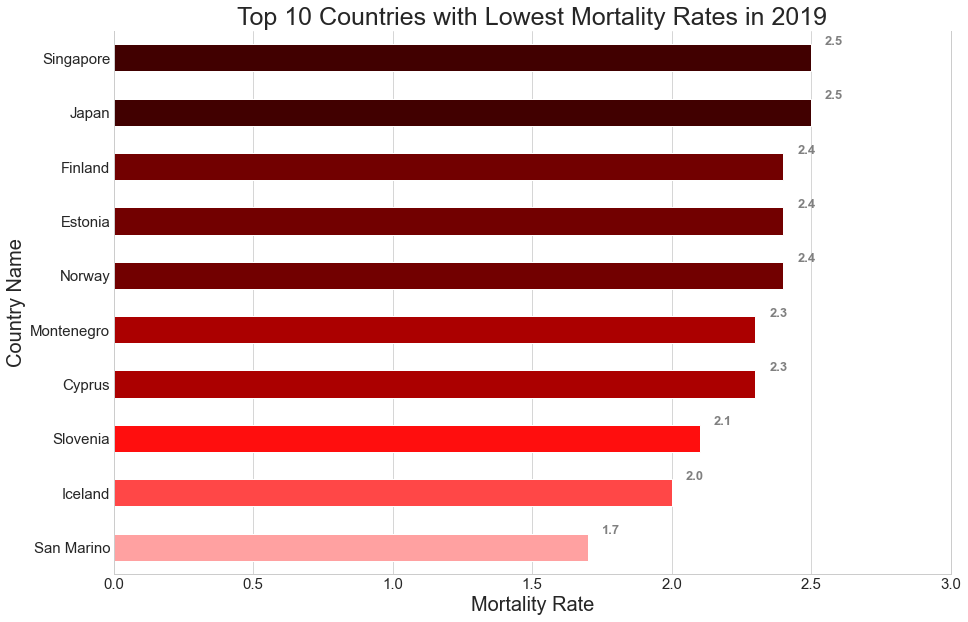

In [17]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
cleaned_mortality1.plot(x = 'Country Name', y = '2019', fontsize=15, kind='barh', color=['#FFa1a1', '#FF4747', '#FF0e0e', '#ab0000', '#ab0000', '#720000', '#720000', '#720000', '#410000', '#410000'], ax=ax, edgecolor='w')

for i in ax.patches:
    plt.text(i.get_width()+0.05, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 13, fontweight ='bold',
             color ='grey')
    
ax.set_title('Top 10 Countries with Lowest Mortality Rates in 2019', fontsize=25)
ax.set_xlabel('Mortality Rate', fontsize=20)
ax.set_ylabel('Country Name', fontsize=20)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.legend_=None
ax.set_xlim([0, 3.0])

plt.savefig(fname = 'Final-LowestRates_2019')

<i> **From the graph above, we can see that 8 out of 10 of the top 10 countries with the lowest mortality rates in 2019 are from Europe, while the two countries at the bottom of the list are from Asia. With European countries having a low child mortality rate, the data from the graph is seen to be consistent with the data from** [`Eurostat Data` Decline in Mortality Rate](https://ec.europa.eu/eurostat/web/products-eurostat-news/-/ddn-20210604-1). <br>

<i> **As per the data from the** [`World Health Organization` Children: Improving Survival and Wellbeing](https://www.who.int/news-room/fact-sheets/detail/children-reducing-mortality) **the decline in child mortality rates can be associated with the decline in infectious diseases due to effective treatments and prevention practices, as part of Europe's initiative to achieve Sustainable Development Goal 3.2.1 across the region. This is something that other regions should look into more as healthcare should always remain a top priority for the people.**

In [18]:
cleaned_mortality2 = cleaned_mortality.sort_values(by = '2019', ascending = False).head(10)
cleaned_mortality2.drop(['Country Code', 'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'], axis=1, inplace=True)
cleaned_mortality2

,Country Name,2019
174,Nigeria,117.20000
213,Somalia,117.00000
229,Chad,113.80000
34,Central African Republic,110.10000
210,Sierra Leone,109.20000
85,Guinea,98.80000
3,Africa Western and Central,96.81424
216,South Sudan,96.20000
158,Mali,94.00000
18,Benin,90.30000


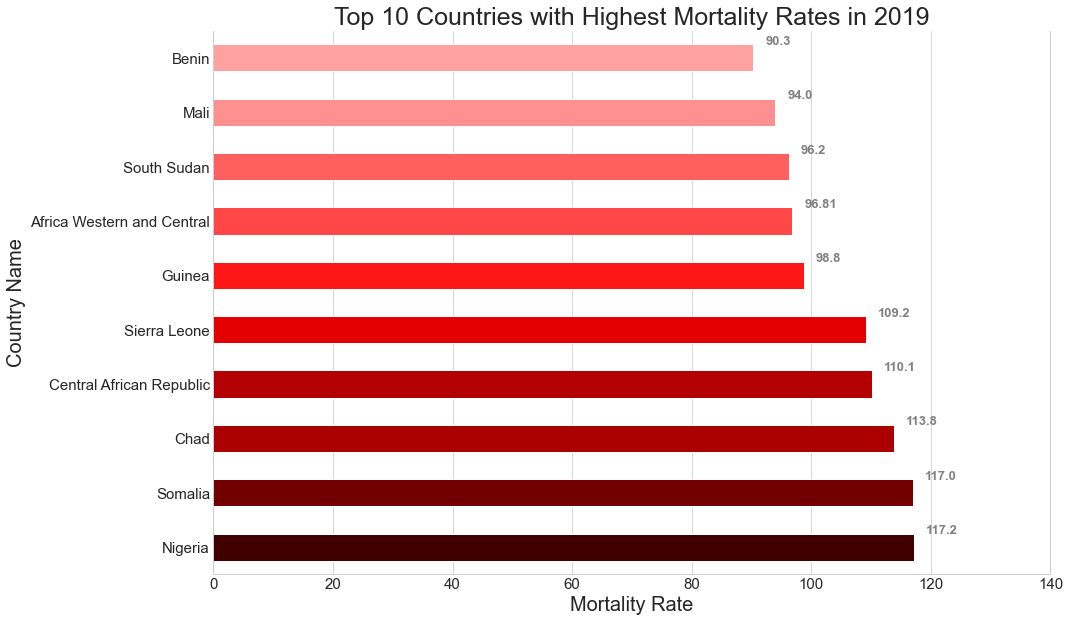

In [19]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
cleaned_mortality2.plot(x = 'Country Name', y = '2019', fontsize=15, kind='barh', color=['#410000', '#720000', '#ab0000', '#b30000', '#e40000', '#ff1616', '#ff4747', '#ff5f5f', '#ff9090', '#ffa1a1'], ax=ax, edgecolor='w')

for i in ax.patches:
    plt.text(i.get_width()+2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 13, fontweight ='bold',
             color ='grey')
    
ax.set_title('Top 10 Countries with Highest Mortality Rates in 2019', fontsize=25)
ax.set_xlabel('Mortality Rate', fontsize=20)
ax.set_ylabel('Country Name', fontsize=20)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.legend_=None
ax.set_xlim([0, 140])

plt.savefig(fname = 'Final-HighestRates_2019')

<i> **From the graph above, it can be seen that all the countries in the list of top 10 countries with the highest mortality rates in 2019 are from the African continent. With this observation, the data from the graph is consistent with the data from** [`Statista` Countries with Highest Mortality Rates in 2019](https://www.statista.com/statistics/281580/countries-with-highest-mortality-rate-among-children-aged-under-five/). <br>

<i> **Although the rates have declined over the years, many African countries being at the top of the list still call for a huge concern. From the data presented in** [`Our World in Data` What are Children Dying From](https://ourworldindata.org/what-are-children-dying-from-and-what-can-we-do-about-it) **high child mortality rates are caused mostly by different health issues such as respiratory and infectious diseases, bacterial infections, and neonatal disorders. These can be prevented and treated through vaccines, good nutrition, increased access to healthcare services, and a healthy environment for the children.**

# ---------------------------------------------------------------- Nicole ------------------------------------------------------------------------------------


In [102]:
import os 
import csv
import time
import numpy as np
import pandas as pd
import seaborn as sns
import requests 
import datetime as dt
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point
from IPython.core.display import HTML

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [103]:
plt.style.use('seaborn-whitegrid')

<hr>
<hr>

# **Data Visualization**

In [142]:
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]

Since all cleaned datasets have the year 2019 present, we can focus on the year 2019

In [143]:
cleaned_cause.drop(cause.index[cause['Year'] < 2019], inplace=True)
cleaned_cause.drop(cleaned_cause.index[cleaned_cause['Country Name'] == 'World'], inplace=True)
cleaned_cause_2019 = cleaned_cause
cleaned_cause_2019.to_csv('Databases/cleaned_cause_2019.csv')
cleaned_cause_2019.head()

,Country Name,Country Code,Year,Invasive Non-typhoidal Salmonella (iNTS),Interpersonal violence,Nutritional deficiencies,Acute hepatitis,Neoplasms,Measles,Digestive diseases,...,Other neonatal disorders,Whooping cough,Diarrheal diseases,"Fire, heat, and hot substances",Road injuries,Tuberculosis,HIV/AIDS,Drowning,Malaria,Syphilis
29,Afghanistan,AFG,2019,173.650632,240.0,925.0,307.0,620.0,1061.0,636.0,...,10986.0,3104.0,4109.0,110.0,609.0,344.0,98.0,552.0,92.0,369.513869
149,Albania,ALB,2019,0.072982,1.0,2.0,0.0,17.0,1.0,9.0,...,88.0,3.0,1.0,2.0,6.0,0.0,0.0,5.0,0.0,2.363532
179,Algeria,DZA,2019,8.178061,9.0,27.0,10.0,125.0,75.0,128.0,...,1954.0,244.0,254.0,63.0,483.0,9.0,19.0,83.0,0.0,80.525873
239,American Samoa,ASM,2019,0.006926,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.178882
299,Andorra,AND,2019,0.000490,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022067


In [144]:
type(cleaned_cause_2019) 

pandas.core.frame.DataFrame

In [145]:
print(cleaned_cause_2019.columns)

Index(['Country Name', 'Country Code', 'Year',
       'Invasive Non-typhoidal Salmonella (iNTS)  ',
       'Interpersonal violence  ', 'Nutritional deficiencies  ',
       'Acute hepatitis  ', 'Neoplasms  ', 'Measles  ', 'Digestive diseases  ',
       'Cirrhosis and other chronic liver diseases  ',
       'Chronic kidney disease  ', 'Cardiovascular diseases  ',
       'Congenital birth defects  ', 'Lower respiratory infections  ',
       'Neonatal preterm birth  ', 'Environmental heat and cold exposure  ',
       'Neonatal sepsis and other neonatal infections  ',
       'Exposure to forces of nature  ', 'Diabetes mellitus  ',
       'Neonatal encephalopathy due to birth asphyxia and trauma  ',
       'Meningitis  ', 'Other neonatal disorders  ', 'Whooping cough  ',
       'Diarrheal diseases  ', 'Fire, heat, and hot substances  ',
       'Road injuries  ', 'Tuberculosis  ', 'HIV/AIDS  ', 'Drowning  ',
       'Malaria  ', 'Syphilis  '],
      dtype='object')


### Since the cause of deaths have many different columns, I organized them into categories to simplify the amount of visualizations needed.

1. **Sexually transmitted diseases** - Syphilis, HIV/AIDS  

2. **Accidents** - Fire, heat, and hot substances, Environmental heat and cold exposure, Road injuries, Interpersonal violence, Drowning, Exposure to forces of nature 

3. **Relating to newborn** - Neonatal preterm birth, Other neonatal disorders, Neonatal encephalopathy due to birth asphyxia and trauma, Neonatal sepsis and other neonatal infections, Congenital birth defects  

4. **Chronic diseases** - Cirrhosis and other chronic liver diseases, Chronic kidney disease, Diabetes mellitus, Neoplasms

5. **Bacterial** - Invasive Non-typhoidal Salmonella (iNTS), Tuberculosis, Whooping cough 

6. **Parasitic** - Malaria

7. **Viral** - Measles

8. **Mixed** (cause can be bacterial/viral/parasitic) - Acute hepatitis, Lower respiratory infections, Meningitis Diarrheal diseases

9. Can be caused by **lifestyle** - Nutritional deficiencies, Cardiovascular diseases, Digestive diseases  






## Sexually Transmitted Diseases

In [146]:
STDs = pd.read_csv('Databases/cleaned_cause_2019.csv', usecols=['Country Name', 'Country Code',
                                                                'Syphilis  ', 'HIV/AIDS  '])
STDs.head()

,Country Name,Country Code,HIV/AIDS,Syphilis
0,Afghanistan,AFG,98.0,369.513869
1,Albania,ALB,0.0,2.363532
2,Algeria,DZA,19.0,80.525873
3,American Samoa,ASM,0.0,1.178882
4,Andorra,AND,0.0,0.022067


In [147]:
STDs_cols_to_sum = ['Syphilis  ', 'HIV/AIDS  ']
STDs_total =STDs[STDs_cols_to_sum].sum(axis= 1).sum(axis = 0)
STDs_total

130194.35803853499

In [148]:
type(STDs_total)

numpy.float64

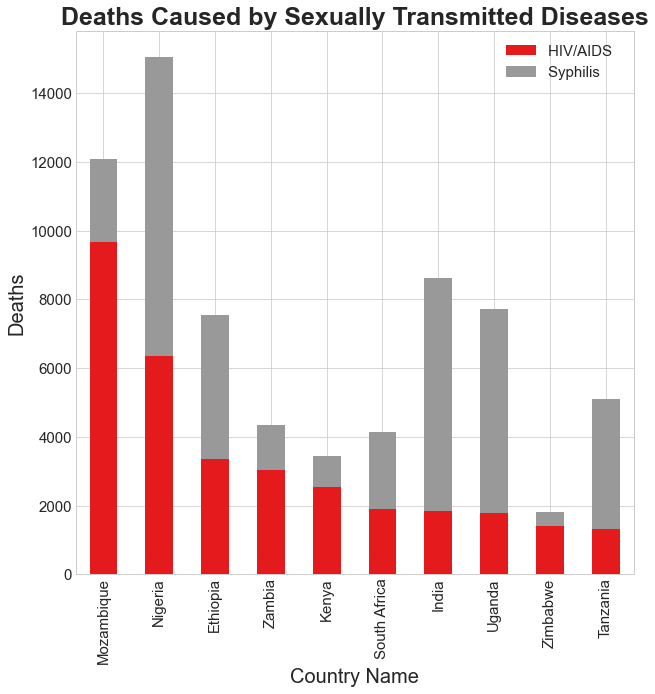

In [149]:
topSTDs = STDs.sort_values(by = ['HIV/AIDS  ','Syphilis  '], ascending=[False, False]).head(10)
axes_STDs = topSTDs.plot.bar(x='Country Name', stacked=True, figsize=(10,10), cmap= 'Set1')

axes_STDs.set_title('Deaths Caused by Sexually Transmitted Diseases', fontweight="bold", fontsize=25)
axes_STDs.set_xlabel('Country Name', fontsize=20)
axes_STDs.set_ylabel('Deaths', fontsize=20)
axes_STDs.legend(fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15);

plt.savefig(fname = 'STDs')

## Accidents

In [150]:
Accidents = pd.read_csv('Databases/cleaned_cause_2019.csv', usecols=['Country Name', 'Country Code',
                                                                     'Fire, heat, and hot substances  ', 
                                                                     'Environmental heat and cold exposure  ', 
                                                                     'Road injuries  ', 'Interpersonal violence  ', 
                                                                     'Drowning  ', 'Exposure to forces of nature  '])
Accidents.head()

,Country Name,Country Code,Interpersonal violence,Environmental heat and cold exposure,Exposure to forces of nature,"Fire, heat, and hot substances",Road injuries,Drowning
0,Afghanistan,AFG,240.0,1.0,43.0,110.0,609.0,552.0
1,Albania,ALB,1.0,0.0,2.0,2.0,6.0,5.0
2,Algeria,DZA,9.0,1.0,0.0,63.0,483.0,83.0
3,American Samoa,ASM,0.0,0.0,0.0,0.0,0.0,0.0
4,Andorra,AND,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
Accidents_cols_to_sum = ['Fire, heat, and hot substances  ', 'Environmental heat and cold exposure  ', 
                         'Road injuries  ', 'Interpersonal violence  ', 'Drowning  ', 
                         'Exposure to forces of nature  ']
Accidents_total =Accidents[Accidents_cols_to_sum].sum(axis= 1).sum(axis = 0)
Accidents_total

103558.0

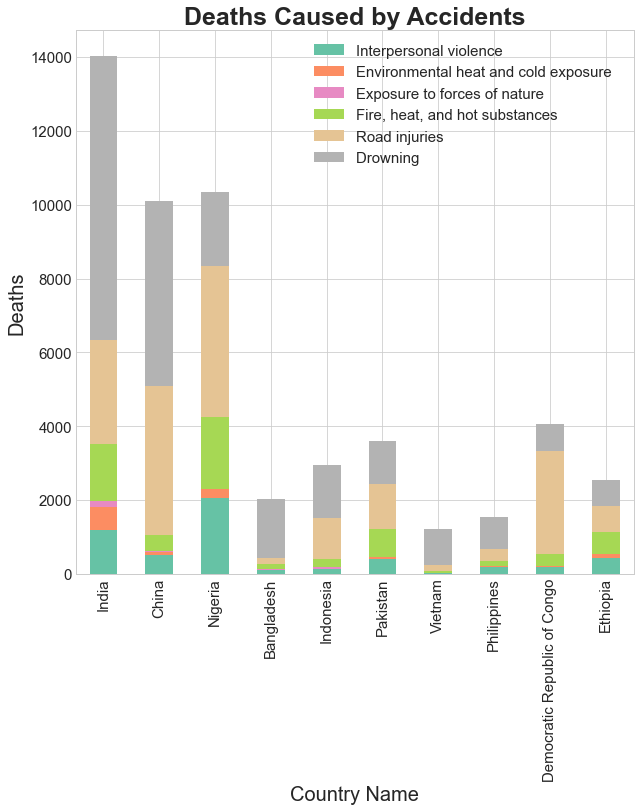

In [152]:
topAccidents = Accidents.sort_values(by = ['Drowning  ','Road injuries  ',
                                           'Fire, heat, and hot substances  ', 
                                            'Environmental heat and cold exposure  ',
                                           'Exposure to forces of nature  ',
                                            'Interpersonal violence  '],
                                           ascending=[False,False,False,False,False,False]).head(10)

axes_accidents = topAccidents.plot.bar(x='Country Name', stacked=True, figsize=(10,10), cmap= 'Set2')

axes_accidents.set_title('Deaths Caused by Accidents', fontweight="bold", fontsize=25)
axes_accidents.set_xlabel('Country Name', fontsize=20)
axes_accidents.set_ylabel('Deaths', fontsize=20)
axes_accidents.legend(fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15);

plt.savefig(fname = 'Accidents')

## Relating to Newborn

In [153]:
Newborn = pd.read_csv('Databases/cleaned_cause_2019.csv', usecols=['Country Name', 'Country Code',
                                                                   'Neonatal sepsis and other neonatal infections  ',
                                                                   'Other neonatal disorders  ',
                                                                   'Neonatal encephalopathy due to birth asphyxia and trauma  ',
                                                                   'Neonatal preterm birth  ','Congenital birth defects  '])

Newborn.head()

,Country Name,Country Code,Congenital birth defects,Neonatal preterm birth,Neonatal sepsis and other neonatal infections,Neonatal encephalopathy due to birth asphyxia and trauma,Other neonatal disorders
0,Afghanistan,AFG,16589.0,8516.0,1243.0,2394.0,10986.0
1,Albania,ALB,98.0,53.0,1.0,17.0,88.0
2,Algeria,DZA,4936.0,5499.0,363.0,860.0,1954.0
3,American Samoa,ASM,1.0,2.0,0.0,1.0,1.0
4,Andorra,AND,0.0,0.0,0.0,0.0,0.0


In [154]:
Newborn_cols_to_sum = ['Neonatal sepsis and other neonatal infections  ','Other neonatal disorders  ',
                       'Neonatal encephalopathy due to birth asphyxia and trauma  ','Neonatal preterm birth  ',
                       'Congenital birth defects  ']
Newborn_total = Newborn[Newborn_cols_to_sum].sum(axis= 1).sum(axis = 0)
Newborn_total

2301853.0

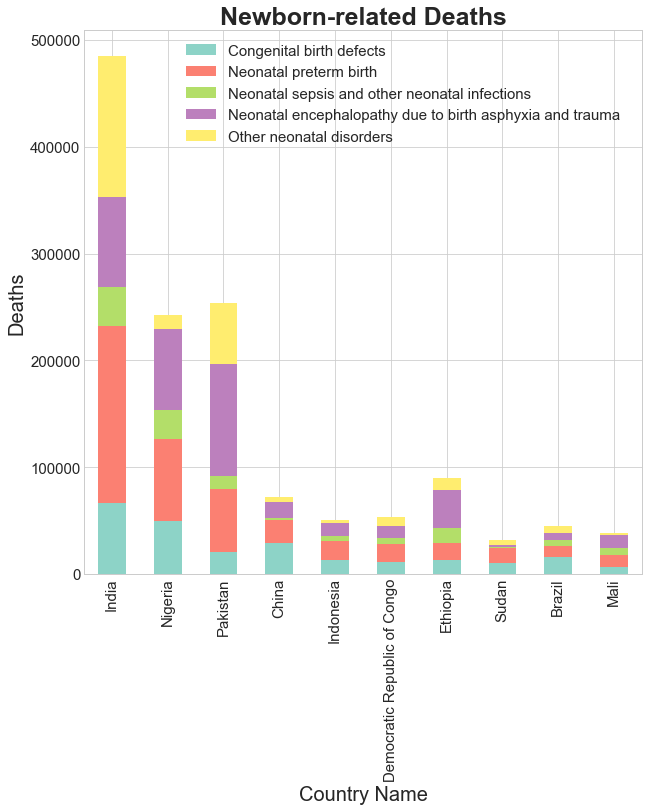

In [155]:
topNewborn = Newborn.sort_values(by = ['Neonatal preterm birth  ','Other neonatal disorders  ',
                       'Neonatal encephalopathy due to birth asphyxia and trauma  ',
                        'Neonatal sepsis and other neonatal infections  ',
                       'Congenital birth defects  '], ascending=[False,False,False,False,False]).head(10)

axes_newborn = topNewborn.plot.bar(x='Country Name', stacked=True, figsize=(10,10), cmap= 'Set3')

axes_newborn.set_title('Newborn-related Deaths', fontweight="bold", fontsize=25)
axes_newborn.set_xlabel('Country Name', fontsize=20)
axes_newborn.set_ylabel('Deaths', fontsize=20)
axes_newborn.legend(fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15);

plt.savefig(fname = 'Newborn')

## Chronic Diseases

In [156]:
CDs =  pd.read_csv('Databases/cleaned_cause_2019.csv', usecols=['Country Name', 'Country Code',
                                                                'Cirrhosis and other chronic liver diseases  ', 
                                                              'Chronic kidney disease  ', 'Diabetes mellitus  ',
                                                              'Neoplasms  '])
CDs.head()

,Country Name,Country Code,Neoplasms,Cirrhosis and other chronic liver diseases,Chronic kidney disease,Diabetes mellitus
0,Afghanistan,AFG,620.0,194.0,299.0,62.0
1,Albania,ALB,17.0,2.0,2.0,0.0
2,Algeria,DZA,125.0,46.0,71.0,15.0
3,American Samoa,ASM,0.0,0.0,0.0,0.0
4,Andorra,AND,0.0,0.0,0.0,0.0


In [157]:
CDs_cols_to_sum = ['Neoplasms  ','Diabetes mellitus  ','Cirrhosis and other chronic liver diseases  ',
                        'Chronic kidney disease  ']
CDs_total = CDs[CDs_cols_to_sum ].sum(axis= 1).sum(axis = 0)
CDs_total

63267.0

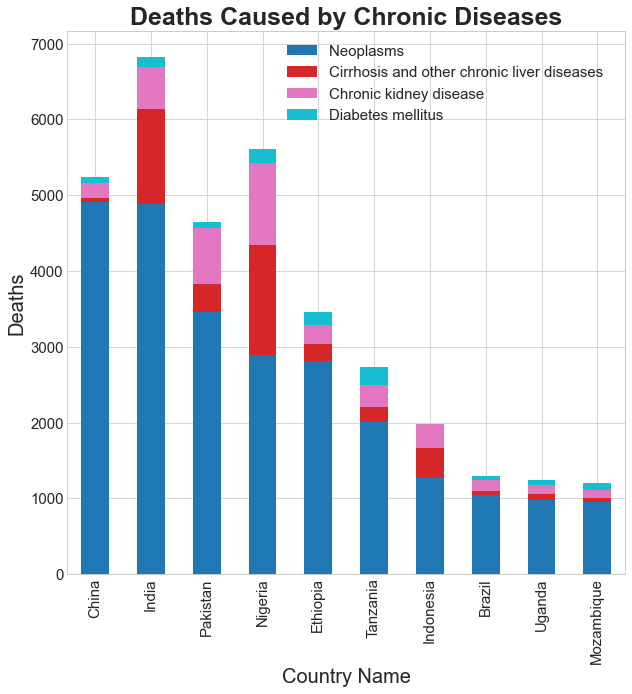

In [158]:
topCDs = CDs.sort_values(by = ['Neoplasms  ','Diabetes mellitus  ','Cirrhosis and other chronic liver diseases  ',
                               'Chronic kidney disease  ' ], ascending=[False,False,False,False]).head(10)

axes_CDs = topCDs.plot.bar(x='Country Name', stacked=True, figsize=(10,10), cmap= 'tab10')

axes_CDs.set_title('Deaths Caused by Chronic Diseases', fontweight="bold", fontsize=25)
axes_CDs.set_xlabel('Country Name', fontsize=20)
axes_CDs.set_ylabel('Deaths', fontsize=20)
axes_CDs.legend(fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15);

plt.savefig(fname = 'CDs')

## Bacterial

In [159]:
Bacterial = pd.read_csv('Databases/cleaned_cause_2019.csv', usecols=['Country Name', 'Country Code',
                                                                     'Invasive Non-typhoidal Salmonella (iNTS)  ',
                                                                     'Tuberculosis  ','Whooping cough  '])
Bacterial.head()

,Country Name,Country Code,Invasive Non-typhoidal Salmonella (iNTS),Whooping cough,Tuberculosis
0,Afghanistan,AFG,173.650632,3104.0,344.0
1,Albania,ALB,0.072982,3.0,0.0
2,Algeria,DZA,8.178061,244.0,9.0
3,American Samoa,ASM,0.006926,0.0,0.0
4,Andorra,AND,0.000490,0.0,0.0


In [160]:
Bacterial_cols_to_sum = ['Invasive Non-typhoidal Salmonella (iNTS)  ', 'Tuberculosis  ','Whooping cough  ']
Bacterial_total = Bacterial[Bacterial_cols_to_sum].sum(axis= 1).sum(axis = 0)
Bacterial_total

207733.21192715602

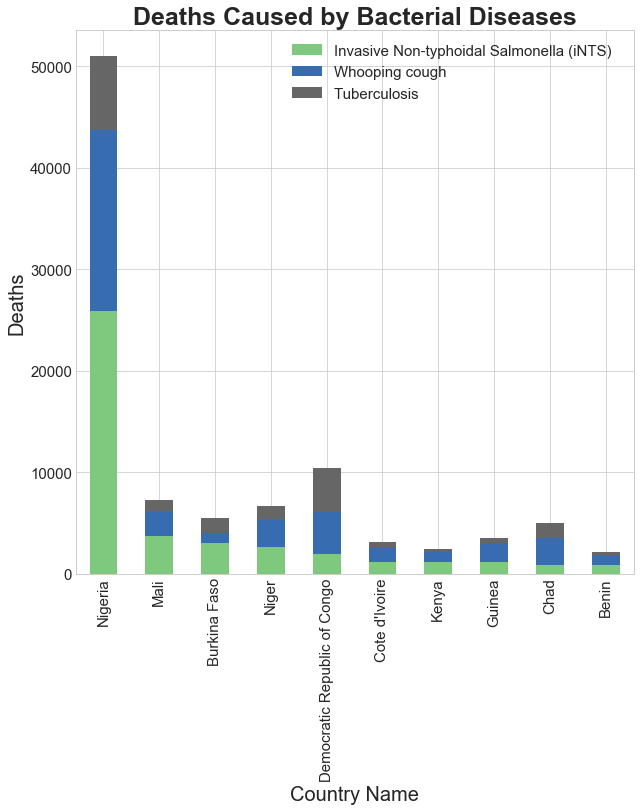

In [161]:
topBacterial = Bacterial.sort_values(by = ['Invasive Non-typhoidal Salmonella (iNTS)  ', 'Tuberculosis  ',
                                           'Whooping cough  ' ], ascending=[False,False,False]).head(10)

axes_bact = topBacterial.plot.bar(x='Country Name', stacked=True, figsize=(10,10), cmap= 'Accent')

axes_bact.set_title('Deaths Caused by Bacterial Diseases', fontweight="bold", fontsize=25)
axes_bact.set_xlabel('Country Name', fontsize=20)
axes_bact.set_ylabel('Deaths', fontsize=20)
axes_bact.legend(fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15);

plt.savefig(fname = 'Bacterial')

## Parasitic

In [162]:
Malaria = pd.read_csv('Databases/cleaned_cause_2019.csv', usecols=['Country Name', 'Country Code', 'Malaria  '])
Malaria.head()

,Country Name,Country Code,Malaria
0,Afghanistan,AFG,92.0
1,Albania,ALB,0.0
2,Algeria,DZA,0.0
3,American Samoa,ASM,0.0
4,Andorra,AND,0.0


In [163]:
Malaria_cols_to_sum = ['Malaria  ']
Malaria_total = Malaria[Malaria_cols_to_sum].sum()
Malaria_total

Malaria      356284.0
dtype: float64

In [164]:
topMalaria = Malaria.sort_values(by = 'Malaria  ', ascending=False).head(10)
topMalaria

,Country Name,Country Code,Malaria
129,Nigeria,NGA,95636.0
48,Democratic Republic of Congo,COD,44078.0
190,Uganda,UGA,17386.0
128,Niger,NER,16565.0
28,Burkina Faso,BFA,16395.0
108,Mali,MLI,14108.0
43,Cote d'Ivoire,CIV,13994.0
179,Tanzania,TZA,13364.0
60,Ethiopia,ETH,11315.0
68,Ghana,GHA,10112.0


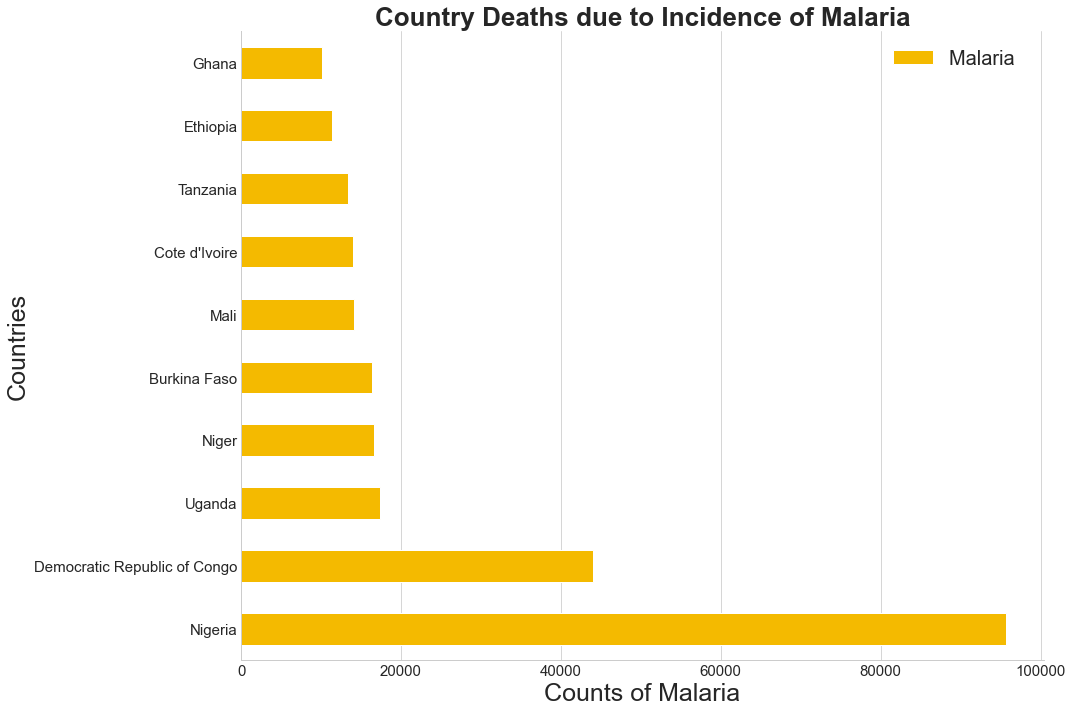

In [165]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
topMalaria.plot(x = 'Country Name', y = 'Malaria  ', fontsize=15, kind='barh', ax=ax, edgecolor='w', color = '#F4BA00')

ax.set_title('Country Deaths due to Incidence of Malaria', fontsize=26, fontweight ='bold')
ax.set_xlabel('Counts of Malaria', fontsize=25)
ax.set_ylabel('Countries', fontsize=25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.legend(fontsize=20)

plt.tight_layout()
plt.savefig(fname = 'Malaria')

## Viral 

In [166]:
Measles = pd.read_csv('Databases/cleaned_cause_2019.csv', usecols=['Country Name', 'Country Code', 'Measles  '])
Measles.head()

,Country Name,Country Code,Measles
0,Afghanistan,AFG,1061.0
1,Albania,ALB,1.0
2,Algeria,DZA,75.0
3,American Samoa,ASM,1.0
4,Andorra,AND,0.0


In [167]:
Measles_cols_to_sum = ['Measles  ']
Measles_total = Measles[Measles_cols_to_sum].sum()
Measles_total

Measles      69798.0
dtype: float64

In [168]:
topMeasles = Measles.sort_values(by = 'Measles  ', ascending=False).head(10)
topMeasles

,Country Name,Country Code,Measles
128,Niger,NER,9654.0
166,Somalia,SOM,6569.0
129,Nigeria,NGA,6076.0
81,India,IND,4064.0
190,Uganda,UGA,3759.0
48,Democratic Republic of Congo,COD,3123.0
179,Tanzania,TZA,2978.0
108,Mali,MLI,2444.0
35,Chad,TCD,2382.0
136,Pakistan,PAK,2277.0


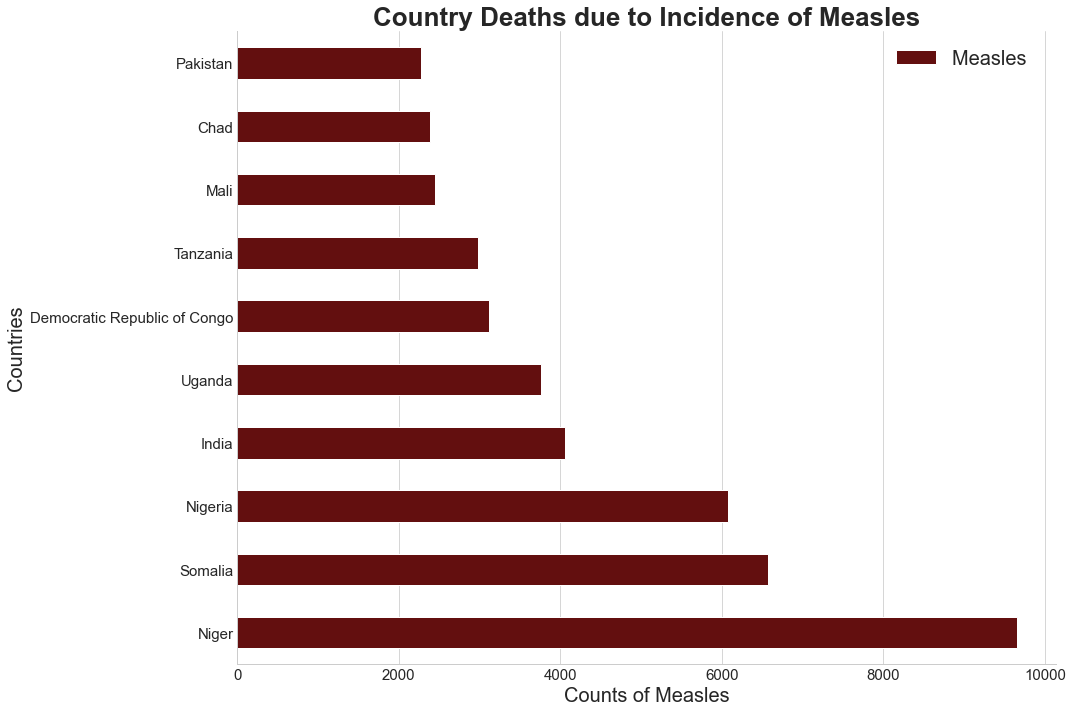

In [169]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
topMeasles.plot(x = 'Country Name', y = 'Measles  ', fontsize=15, kind='barh', ax=ax, edgecolor='w',color = '#630F0F')

ax.set_title('Country Deaths due to Incidence of Measles', fontsize=26, fontweight = 'bold')
ax.set_xlabel('Counts of Measles', fontsize=20)
ax.set_ylabel('Countries', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.legend(fontsize=20)

plt.tight_layout()
plt.savefig(fname = 'Measles')

## Mixed

In [170]:
Mixed = pd.read_csv('Databases/cleaned_cause_2019.csv', usecols=['Country Name','Country Code',
                                                                 'Acute hepatitis  ', 'Lower respiratory infections  ',
                                                                 'Meningitis  ', 'Diarrheal diseases  '])
Mixed.head()

,Country Name,Country Code,Acute hepatitis,Lower respiratory infections,Meningitis,Diarrheal diseases
0,Afghanistan,AFG,307.0,13770.0,953.0,4109.0
1,Albania,ALB,0.0,65.0,3.0,1.0
2,Algeria,DZA,10.0,766.0,64.0,254.0
3,American Samoa,ASM,0.0,1.0,0.0,0.0
4,Andorra,AND,0.0,0.0,0.0,0.0


In [171]:
Mixed_cols_to_sum = ['Acute hepatitis  ', 'Lower respiratory infections  ', 'Meningitis  ', 'Diarrheal diseases  ']
Mixed_total = Mixed[Mixed_cols_to_sum].sum(axis= 1).sum(axis = 0)
Mixed_total

1296307.0

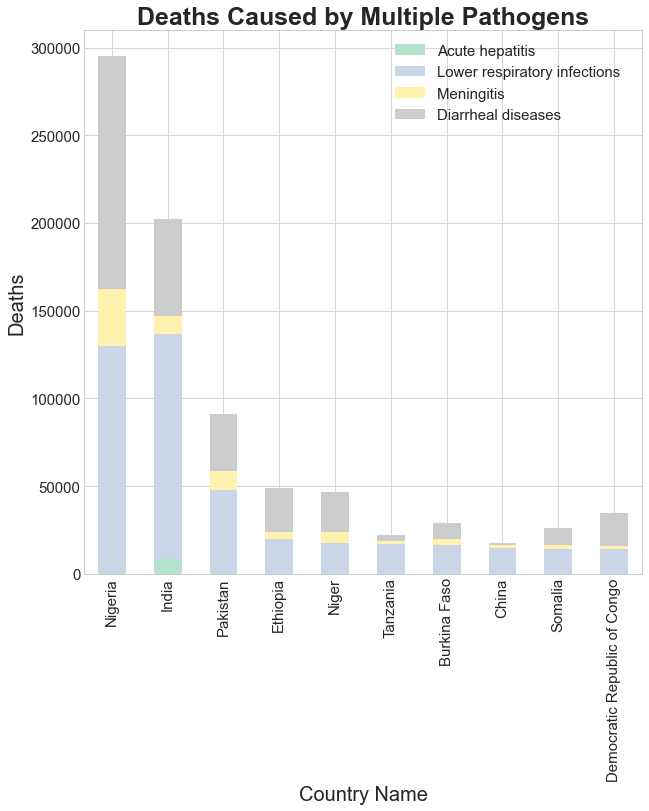

In [172]:
topMixed = Mixed.sort_values(by = [ 'Lower respiratory infections  ', 'Diarrheal diseases  ',
                                   'Meningitis  ','Acute hepatitis  '], ascending=[False,False,False,False]).head(10)

axes_mixed = topMixed.plot.bar(x='Country Name', stacked=True, figsize=(10,10), cmap= 'Pastel2')

axes_mixed.set_title('Deaths Caused by Multiple Pathogens', fontweight="bold", fontsize=25)
axes_mixed.set_xlabel('Country Name', fontsize=20)
axes_mixed.set_ylabel('Deaths', fontsize=20)
axes_mixed.legend(fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15);

plt.savefig(fname = 'Mixed')

## Lifestyle

In [173]:
Lifestyle = pd.read_csv('Databases/cleaned_cause_2019.csv', usecols=['Country Name', 'Country Code',
                                                                     'Nutritional deficiencies  ',
                                                                     'Cardiovascular diseases  ',
                                                                     'Digestive diseases  '])
Lifestyle.head()

,Country Name,Country Code,Nutritional deficiencies,Digestive diseases,Cardiovascular diseases
0,Afghanistan,AFG,925.0,636.0,207.0
1,Albania,ALB,2.0,9.0,18.0
2,Algeria,DZA,27.0,128.0,208.0
3,American Samoa,ASM,0.0,0.0,0.0
4,Andorra,AND,0.0,0.0,0.0


In [174]:
Lifestyle_cols_to_sum = ['Nutritional deficiencies  ','Cardiovascular diseases  ','Digestive diseases  ']
Lifestyle_total = Lifestyle[Lifestyle_cols_to_sum].sum(axis= 1).sum(axis = 0)
Lifestyle_total

159648.0

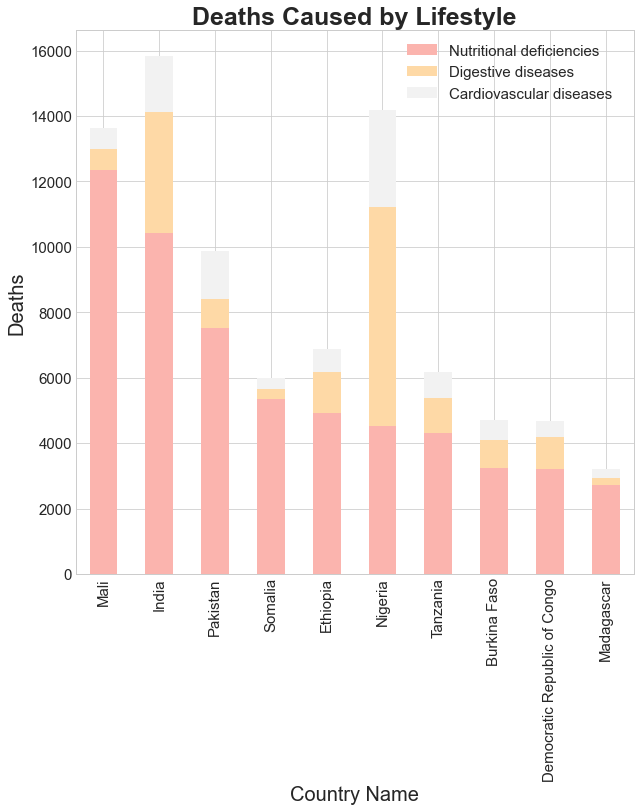

In [175]:
topLife = Lifestyle.sort_values(by = [ 'Nutritional deficiencies  ', 'Cardiovascular diseases  ',
                                      'Digestive diseases  '], ascending=[False,False,False]).head(10)

axes_life = topLife.plot.bar(x='Country Name', stacked=True, figsize=(10,10), cmap= 'Pastel1')

axes_life.set_title('Deaths Caused by Lifestyle', fontweight="bold", fontsize=25)
axes_life.set_xlabel('Country Name', fontsize=20)
axes_life.set_ylabel('Deaths', fontsize=20)
axes_life.legend(fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15);

plt.savefig(fname = 'Lifestyle')

### Now we want to find out which category has the most deaths. 
We can find out using the sum values calculated per category

In [176]:
sumSTDs = int(STDs_total)
sumAcc =int(Accidents_total)
sumNew = int(Newborn_total)
sumCD = int(CDs_total)
sumBac= int(Bacterial_total)
sumParasite = int(Malaria_total) 
sumViral = int(Measles_total)
sumMixed = int(Mixed_total)
sumLife = int(Lifestyle_total)

In [177]:
type(Bacterial_total)

numpy.float64

In [178]:
type(Malaria_total)

pandas.core.series.Series

In [179]:
new_array = np.array([[sumSTDs], [sumAcc],[sumNew], [sumCD], [sumBac], [sumParasite], [sumViral],
                      [sumMixed], [sumLife]])

print(new_array)

[[ 130194]
 [ 103558]
 [2301853]
 [  63267]
 [ 207733]
 [ 356284]
 [  69798]
 [1296307]
 [ 159648]]


In [180]:
type(new_array)

numpy.ndarray

In [181]:
categories_cause = pd.DataFrame(new_array, columns = ['Total Deaths'], index=['STDs', 'Accidents','Newborn Related',
                                                                'Chronic Diseases', 'Bacterial','Parasitic',
                                                                'Viral','Mixed','Lifestyle'],)
categories_cause

,Total Deaths
STDs,130194
Accidents,103558
Newborn Related,2301853
Chronic Diseases,63267
Bacterial,207733
Parasitic,356284
Viral,69798
Mixed,1296307
Lifestyle,159648


In [182]:
categories_cause.max()

Total Deaths    2301853
dtype: int32

In [183]:
reset_categories = categories_cause.reset_index()
reset_categories

,index,Total Deaths
0,STDs,130194
1,Accidents,103558
2,Newborn Related,2301853
3,Chronic Diseases,63267
4,Bacterial,207733
5,Parasitic,356284
6,Viral,69798
7,Mixed,1296307
8,Lifestyle,159648


In [184]:
neat_cause = reset_categories.rename(columns={"index": "Category"}).sort_values('Total Deaths', ascending = False)
neat_cause

,Category,Total Deaths
2,Newborn Related,2301853
7,Mixed,1296307
5,Parasitic,356284
4,Bacterial,207733
8,Lifestyle,159648
0,STDs,130194
1,Accidents,103558
6,Viral,69798
3,Chronic Diseases,63267


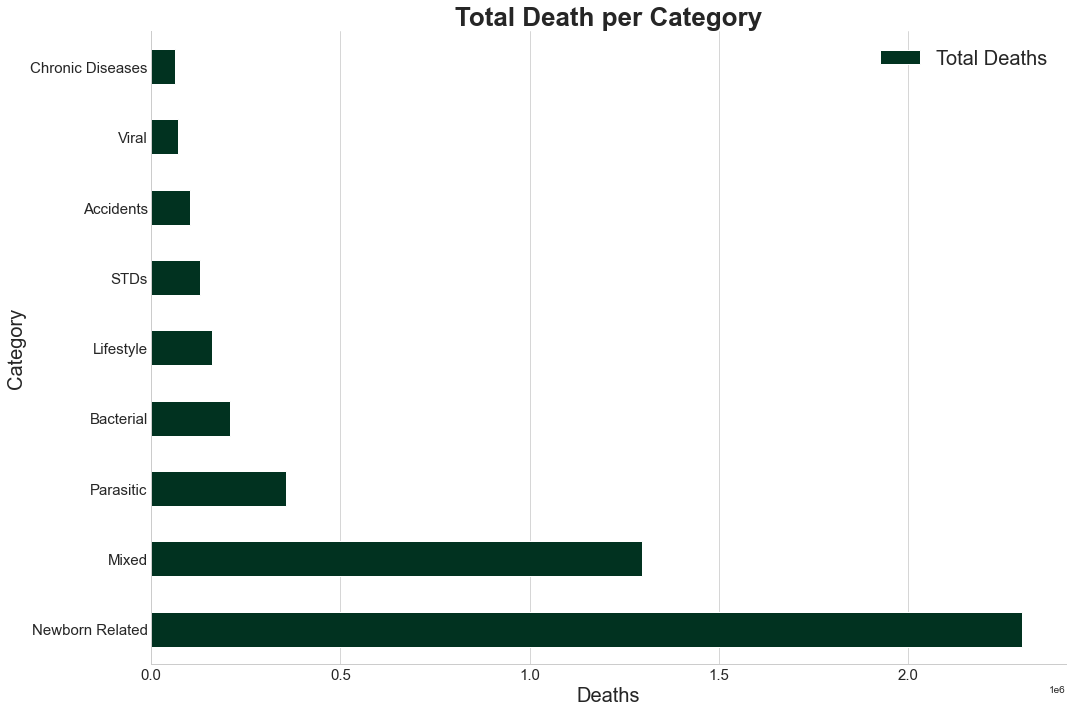

In [185]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)

neat_cause.plot(x = 'Category', y = 'Total Deaths', fontsize=15, kind='barh', ax=ax, edgecolor='w',color = '#013220')

ax.set_title('Total Death per Category', fontsize=26, fontweight = 'bold')
ax.set_xlabel('Deaths', fontsize=20)
ax.set_ylabel('Category', fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(False)
ax.legend(fontsize=20)

plt.tight_layout()
plt.savefig(fname = 'Categories')

The category that has the most data for cause of deaths are the newborn-related deaths.

# ---------------------------------------------------------------- Anton ------------------------------------------------------------------------------------


In [1]:
import os 
import csv
import time
import numpy as np
import pandas as pd
import seaborn as sns
import requests 
import datetime as dt
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from pylab import rcParams
from IPython.core.display import HTML

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.style.use('seaborn-whitegrid')

### Malnutrition Across the Globe

In [41]:
c_mal = pd.read_csv('Databases/cleaned_malnutrition.csv')
c_mal.head()

,Unnamed: 0,Country Name,Country Code,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,0,Afghanistan,AFG,0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,1,Albania,ALB,2,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,2,Algeria,DZA,2,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,3,Angola,AGO,1,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,4,Argentina,ARG,2,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


#### Income Classificaton is a catgory in the dataset and can be converted into int

In [42]:
c_mal["Income Classification"] = c_mal["Income Classification"].astype("int32")

### The pairplot below shows the distibution and relationship between the different variables (or columns).

<Figure size 1152x576 with 0 Axes>

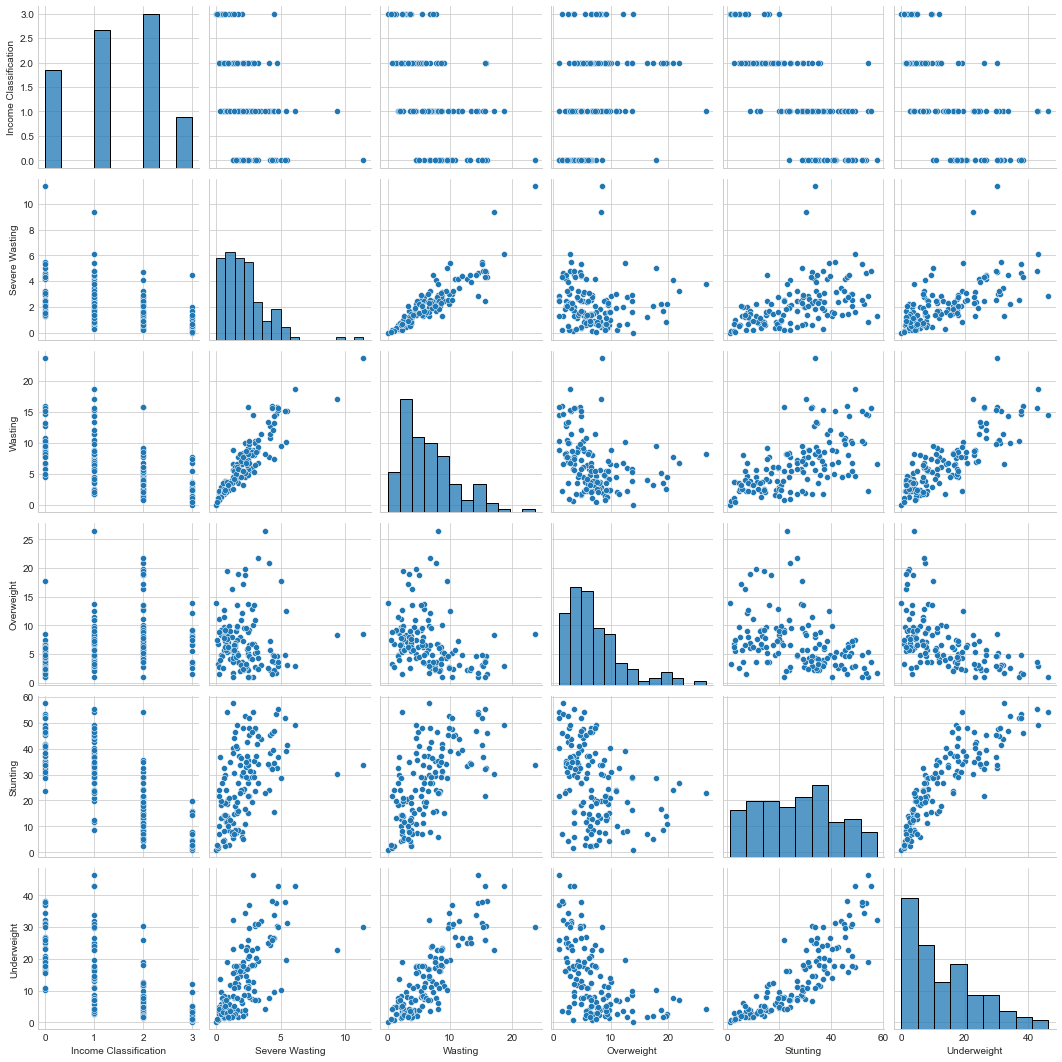

In [43]:
plt.figure(figsize=(16,8))
columns = ["Income Classification","Severe Wasting","Wasting","Overweight","Stunting","Underweight" ]
sns.pairplot(c_mal[columns])
plt.show()

## Choropleths and Bar Charts

The choropleths will visualize t|he percentage of each of the 5 categories in each country in the world.

The bar charts (Income Classification) will be presenting the amount of countries (based on their income classification) with the per categorical mean. 

In [44]:
c_mal.describe()

,Unnamed: 0,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,69.5000,1.357143,2.168650,6.610275,7.067651,26.697061,13.871000,4305.708219
std,40.5586,0.952629,1.708939,4.421861,4.704469,14.672849,11.071818,13685.407194
min,0.0000,0.000000,0.000000,0.000000,0.962500,1.000000,0.100000,1.000000
25%,34.7500,1.000000,0.900000,3.371250,3.650000,14.323214,4.355000,254.217167
50%,69.5000,1.000000,1.872500,5.770000,6.218750,26.750000,10.821667,986.750100
75%,104.2500,2.000000,2.822727,8.688095,9.016667,37.158333,20.481786,3236.924219
max,139.0000,3.000000,11.400000,23.650000,26.500000,57.600000,46.266667,123014.491000


Due to each column having different maximum values, each choropleth plot will show different values

### Severe Wasting

Severe wasting pertains to the extreme undernutrition in children.

With the plots below, it shows that countries with the Income Classification as 0 had the most Severe Wasting. Additionally, the country with the most percentage for this category is South Sudan at 11.4%

C:\Users\Mos\anaconda3\envs\ALTDSI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Income Classification')

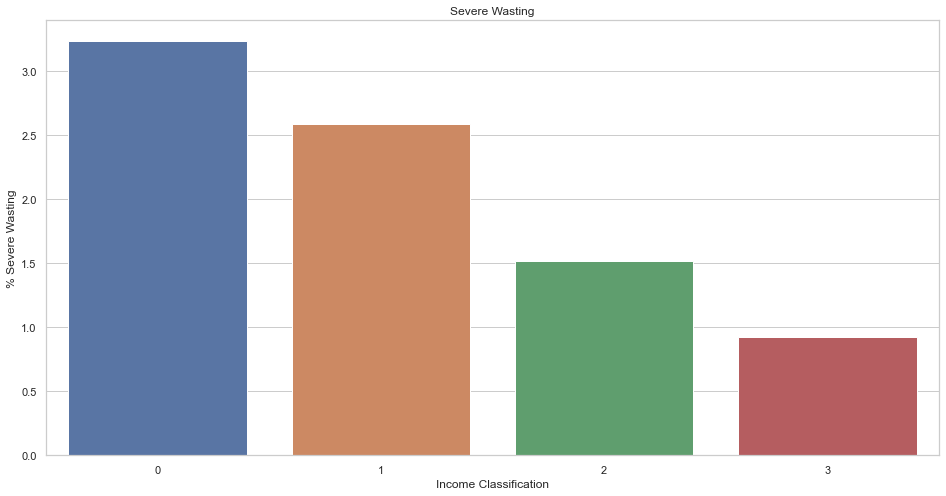

In [45]:
plt.figure(figsize=(16, 8))
x = c_mal.groupby(["Income Classification"])["Severe Wasting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Severe Wasting')
ax.set_ylabel('% Severe Wasting')
ax.set_xlabel('Income Classification')

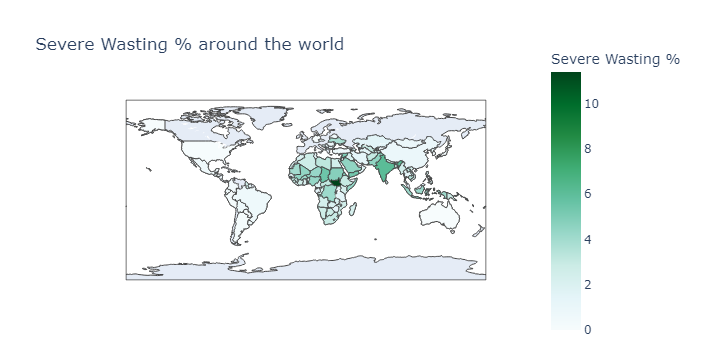

In [46]:
#Severe Wasting plotted on the WorldMap

x = c_mal.groupby(["Country Name"])["Severe Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale = 'BuGn',
            text = x.index,
            z = x,
            colorbar = dict(
                title = 'Severe Wasting %',
                len = 300,
                lenmode = 'pixels'))
layout = dict(geo = {'scope':'world'},title="Severe Wasting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

### Wasting

Wasting is less-extreme than severe wasting.

The plots below present that countries with the Income Classification as 0 had the most Wasting; which is quite similar to Severe Wasting. Additionally, the country with the most percentage for this category is still South Sudan at 23.65%

C:\Users\Mos\anaconda3\envs\ALTDSI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Income Classification')

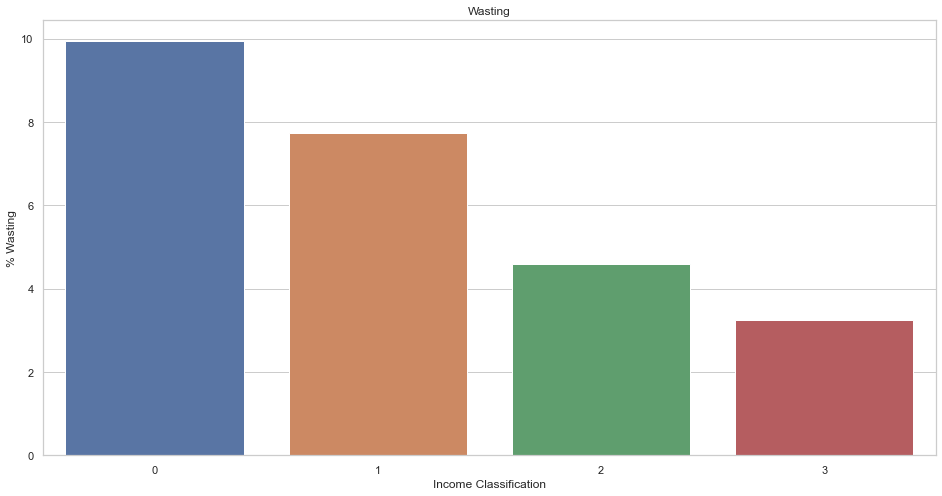

In [47]:
plt.figure(figsize=(16, 8))
x = c_mal.groupby(["Income Classification"])["Wasting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Wasting')
ax.set_ylabel('% Wasting')
ax.set_xlabel('Income Classification')

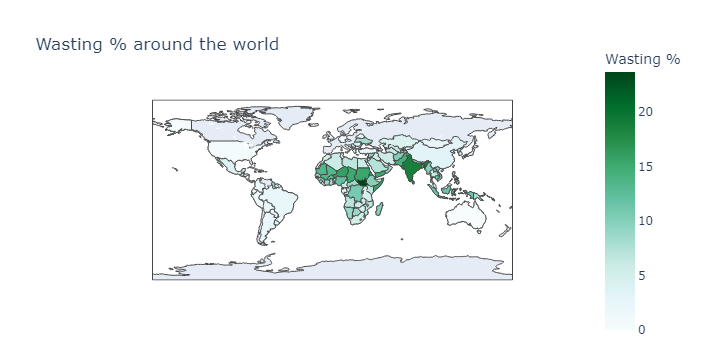

In [48]:
#Wasting plotted on the WorldMap

x = c_mal.groupby(["Country Name"])["Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale = 'BuGn',
            text = x.index,
            z = x,
            colorbar = dict(
                title = 'Wasting %',
                len = 300,
                lenmode = 'pixels'))
layout = dict(geo = {'scope':'world'},title="Wasting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

### Overweight

Pertains to children who are heavier than their ideal weight. For this part, it shows the countries with the most to least percentage of overweight children.

The plot below shows that countries that fall under the Income Classification of 2 have the most number of overweight children.The country with the most percentage for this category is Ukraine at 26.5%

C:\Users\Mos\anaconda3\envs\ALTDSI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Income Classification')

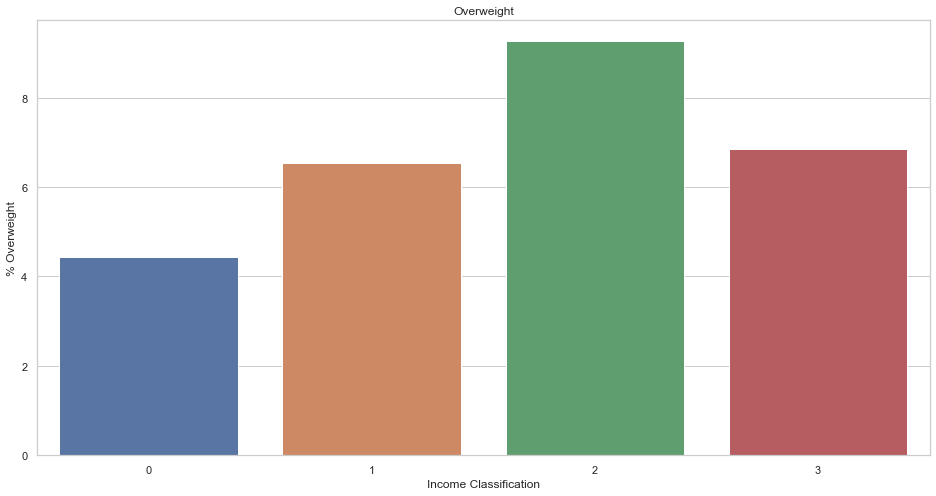

In [49]:
plt.figure(figsize=(16, 8))
x = c_mal.groupby(["Income Classification"])["Overweight"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Overweight')
ax.set_ylabel('% Overweight')
ax.set_xlabel('Income Classification')

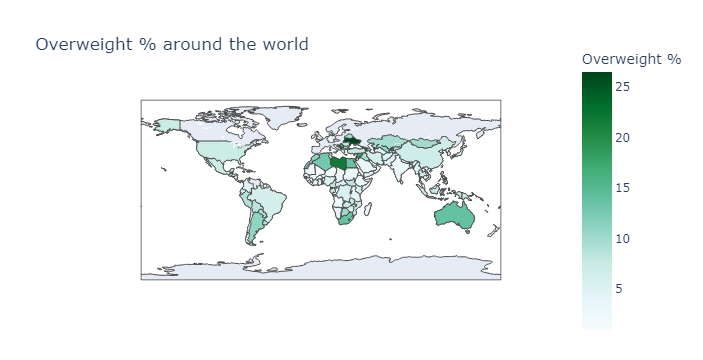

In [50]:
#Overweight plotted on the WorldMap

x = c_mal.groupby(["Country Name"])["Overweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale = 'BuGn',
            text = x.index,
            z = x,
            colorbar = dict(
                title = 'Overweight %',
                len = 300,
                lenmode = 'pixels'))
layout = dict(geo = {'scope':'world'},title="Overweight % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

### Stunting

Pertains to children whose height and overall growthed are stunted. For this part, it shows the countries with the most to least percentage of stunted children.

The plot below shows that countries that fall under the Income Classification of 0 has the most number of children whose growth is stunted.The country with the most percentage for this category is Burundi at 57.6%

C:\Users\Mos\anaconda3\envs\ALTDSI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Income Classification')

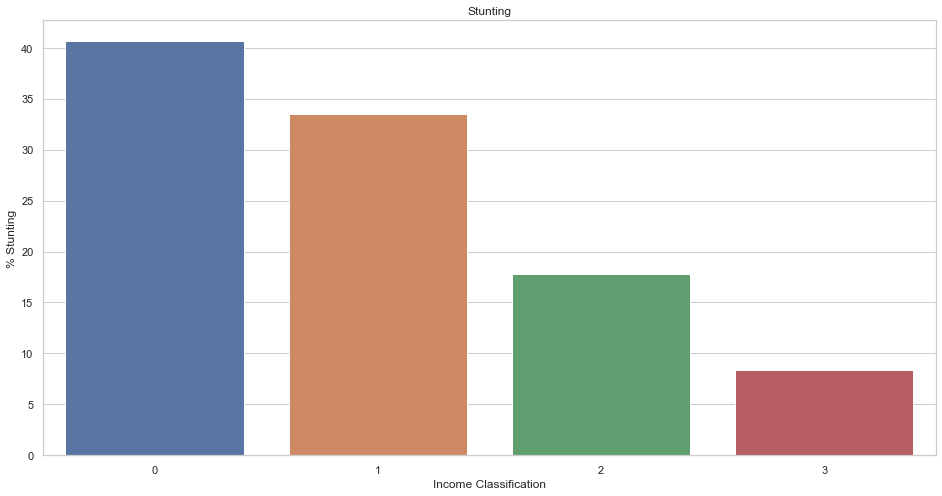

In [51]:
plt.figure(figsize=(16, 8))
x = c_mal.groupby(["Income Classification"])["Stunting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Stunting')
ax.set_ylabel('% Stunting')
ax.set_xlabel('Income Classification')

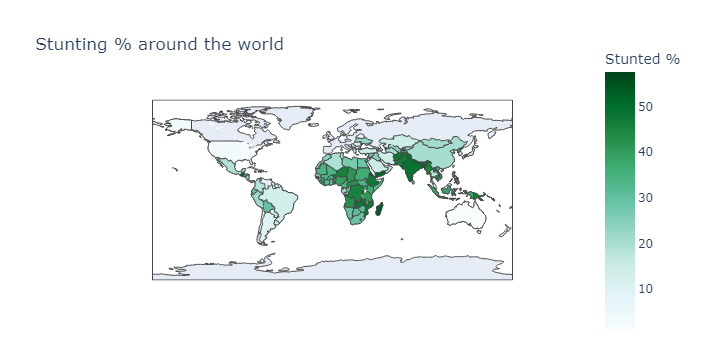

In [52]:
#Stunting plotted on the WorldMap

x = c_mal.groupby(["Country Name"])["Stunting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale = 'BuGn',
            text = x.index,
            z = x,
            colorbar = dict(
                title = 'Stunted %',
                len = 300,
                lenmode = 'pixels'))
layout = dict(geo = {'scope':'world'},title="Stunting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

### Underweight

Pertains to children who are below their ideal healthy weight range. For this part, it shows the countries with the most to least percentage of undeerweight children.

The plot below shows that countries that fall under the Income Classification of 0 have the most number of underweight children.The country with the most percentage for this category is Bangladesh at 46.267%

C:\Users\Mos\anaconda3\envs\ALTDSI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Income Classification')

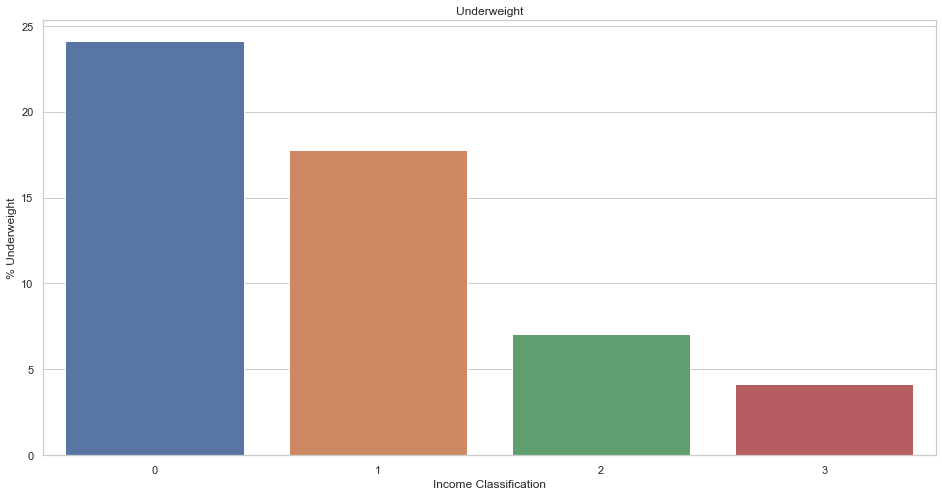

In [53]:
plt.figure(figsize=(16, 8))
x = c_mal.groupby(["Income Classification"])["Underweight"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Underweight')
ax.set_ylabel('% Underweight')
ax.set_xlabel('Income Classification')

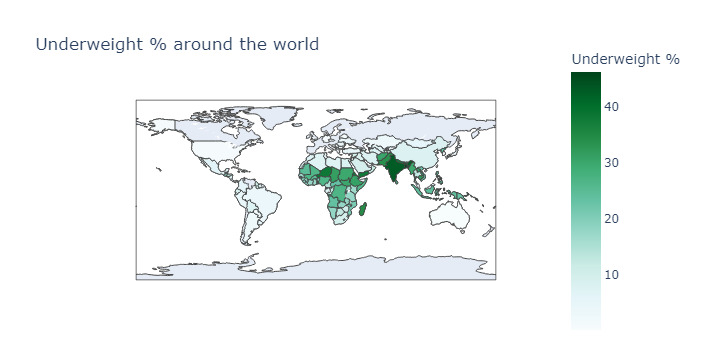

In [54]:
#Stunting plotted on the WorldMap

x = c_mal.groupby(["Country Name"])["Underweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale = 'BuGn',
            text = x.index,
            z = x,
            colorbar = dict(
                title = 'Underweight %',
                len = 300,
                lenmode = 'pixels'))
layout = dict(geo = {'scope':'world'},title="Underweight % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

# Variable comparison

### The plot belows compares the number of countries per income classification for "Wasting" and "Severe Wasting".

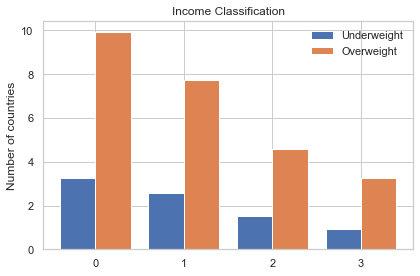

In [57]:
S_Wasting = c_mal.groupby("Income Classification")["Severe Wasting"].mean()
Wasting = c_mal.groupby("Income Classification")["Wasting"].mean()

labels = [0,1,2,3]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, S_Wasting, width, label='Underweight')
rects2 = ax.bar(x + width/2, Wasting, width, label='Overweight')

ax.set_ylabel('Number of countries')
ax.set_title('Income Classification')
ax.set_xticks(labels)
ax.legend()

fig.tight_layout()

plt.show()

### The plot belows compares the number of countries per income classification for "Underweight" and "Overweight"

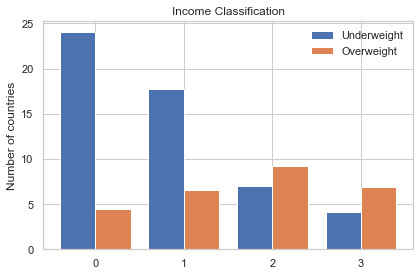

In [58]:
UW = c_mal.groupby("Income Classification")["Underweight"].mean()
OW = c_mal.groupby("Income Classification")["Overweight"].mean()

labels = [0,1,2,3]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, UW, width, label='Underweight')
rects2 = ax.bar(x + width/2, OW, width, label='Overweight')

ax.set_ylabel('Number of countries')
ax.set_title('Income Classification')
ax.set_xticks(labels)
ax.legend()

fig.tight_layout()

plt.show()
